# NF-UQ-NIDS Datasets Analysis

* **Author:** Patrik Goldschmidt (igoldschmidt@fit.vut.cz)
* **Project:** Network Intrusion Datasets: A Survey, Limitations, and Recommendations
* **Date:** 2024

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
PATH_FOLDER = '/data/disk2/nf-uq-nids'
FNAME_V1    = 'NF-UQ-NIDS.csv'
FNAME_V2    = 'NF-UQ-NIDS-v2.csv'

## NF-UQ-NIDS-V1

In [3]:
data_v1  = pd.read_csv(os.path.join(PATH_FOLDER, FNAME_V1))

In [4]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB


In [5]:
len(data_v1)

11994893

In [6]:
data_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


In [7]:
data_v1.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07
mean,4.124519e+04,8.964758e+03,8.661742e+00,1.932050e+01,3.983727e+03,9.489449e+03,3.562578e+01,1.251652e+01,5.095628e+01,2.163429e+06,2.323360e-01
std,2.108654e+04,1.772082e+04,6.404263e+00,3.504857e+01,1.662256e+05,2.933544e+05,1.901997e+03,5.192708e+02,7.733605e+01,2.142507e+06,4.223221e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.299400e+04,5.300000e+01,6.000000e+00,0.000000e+00,6.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,5.061000e+04,4.430000e+02,6.000000e+00,0.000000e+00,2.320000e+02,1.560000e+02,4.000000e+00,2.000000e+00,2.400000e+01,4.178245e+06,0.000000e+00
75%,5.581700e+04,3.389000e+03,6.000000e+00,7.000000e+00,1.440000e+03,1.873000e+03,9.000000e+00,7.000000e+00,2.700000e+01,4.294858e+06,0.000000e+00
max,6.553500e+04,6.553500e+04,2.550000e+02,2.510000e+02,2.282235e+08,2.432197e+08,1.221043e+06,1.349068e+06,2.230000e+02,4.294967e+06,1.000000e+00


In [8]:
# Show the distribution of records within the dataset
data_v1['Dataset'].value_counts()

Dataset
NF-CSE-CIC-IDS2018    8392401
NF-UNSW-NB15          1623118
NF-ToN-IoT            1379274
NF-BoT-IoT             600100
Name: count, dtype: int64

<Axes: ylabel='count'>

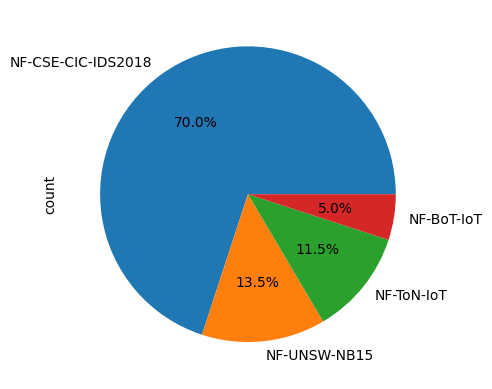

In [9]:
data_v1['Dataset'].value_counts().plot.pie(autopct='%1.1f%%')

In [10]:
data_v1['Label'].value_counts()

Label
0    9208048
1    2786845
Name: count, dtype: int64

In [11]:
data_v1['Attack'].value_counts()

Attack
Benign            9208048
DDoS               763285
Reconnaissance     482946
injection          468575
DoS                348962
Brute Force        291955
password           156299
xss                 99944
Infilteration       62072
Exploits            24736
scanning            21467
Fuzzers             19463
Backdoor            19029
Bot                 15683
Generic              5570
Analysis             1995
Theft                1909
Shellcode            1365
mitm                 1295
Worms                 153
ransomware            142
Name: count, dtype: int64

In [12]:
data_v1['Attack'].nunique()

21

In [13]:
del data_v1

There are not timestamps within the data, so continuity analysis is not possible. However, since the data were compiled from multiple datasets, we consider the data as discontinous.

## NF-UQ-NIDS-V2

In [14]:
# Manual specification of datatypes to preserve memory when loading the data
NF_UQ_NIDS_V2_DTYPES = {
    'L4_SRC_PORT': np.int32,
    'L4_DST_PORT': np.int32,
    'PROTOCOL': np.int32,
    'TCP_FLAGS': np.int16,
    'CLIENT_TCP_FLAGS': np.int16,
    'SERVER_TCP_FLAGS': np.int16,
    'MIN_TTL': np.uint8,
    'MAX_TTL': np.uint8,
    'ICMP_TYPE': np.int16,
    'ICMP_IPV4_TYPE': np.int16,
    'DNS_QUERY_ID': np.int16,
    'DNS_QUERY_TYPE': np.int16,
    'DNS_TTL_ANSWER': np.int16,
    'Label': np.int8
}

In [15]:
file2_fullpath = os.path.join(PATH_FOLDER, FNAME_V2)

!wc -l $file2_fullpath

75987977 /data/disk2/nf-uq-nids/NF-UQ-NIDS-v2.csv


In [16]:
# Limit to ~50% of the original size, since we cannot fit the whole datset into the RAM at once.
data_v2  = pd.read_csv(os.path.join(PATH_FOLDER, FNAME_V2), dtype=NF_UQ_NIDS_V2_DTYPES, low_memory=True, nrows=40000000)

In [17]:
data_v2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000000 entries, 0 to 39999999
Data columns (total 46 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   IPV4_SRC_ADDR                object 
 1   L4_SRC_PORT                  int32  
 2   IPV4_DST_ADDR                object 
 3   L4_DST_PORT                  int32  
 4   PROTOCOL                     int32  
 5   L7_PROTO                     float64
 6   IN_BYTES                     int64  
 7   IN_PKTS                      int64  
 8   OUT_BYTES                    int64  
 9   OUT_PKTS                     int64  
 10  TCP_FLAGS                    int16  
 11  CLIENT_TCP_FLAGS             int16  
 12  SERVER_TCP_FLAGS             int16  
 13  FLOW_DURATION_MILLISECONDS   int64  
 14  DURATION_IN                  int64  
 15  DURATION_OUT                 int64  
 16  MIN_TTL                      uint8  
 17  MAX_TTL                      uint8  
 18  LONGEST_FLOW_PKT             int64  
 19

In [18]:
len(data_v2)

40000000

In [19]:
data_v2.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,2,2,0,4293092,1875,0,64,64,140,140,0,140,140280.0,0.0,140,1,0,0,1120000,0,0,3,0,0,0,512,0,-29696,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,22,2,20,4294499,453,0,64,64,140,40,40,140,280.0,40.0,0,0,0,0,0,320000,1,2,0,0,0,512,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [20]:
data_v2.describe()

/home/goldy/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/home/goldy/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
count,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07
mean,4.039965e+04,3.338046e+03,1.024726e+01,5.330805e+01,1.021422e+03,9.667333e+00,3.125909e+03,4.710338e+00,2.416647e+01,2.216178e+01,9.517779e+00,2.314844e+06,5.334320e+02,1.484732e+01,5.359021e+01,5.364827e+01,2.648283e+02,6.277468e+01,2.358850e+01,2.648283e+02,1.648444e+297,4.680410e+249,7.966004e+01,3.952503e-01,5.673728e+02,5.718451e-01,2.846045e+06,7.203647e+06,2.901648e+01,9.696339e-01,3.653653e-01,3.677016e-01,2.023418e+00,6.007404e+03,8.382580e+03,-1.861091e+03,1.464689e+01,-1.149738e+00,1.384322e+00,4.608915e+01,1.511356e+00,6.687805e-01
std,1.841551e+04,1.066214e+04,5.642445e+00,7.890672e+01,9.619931e+04,5.946587e+02,2.593841e+05,2.021934e+02,5.842836e+01,5.850420e+01,1.803152e+01,2.140415e+06,8.499827e+02,1.160963e+02,3.956244e+01,3.960348e+01,4.307306e+02,4.485833e+01,2.698604e+01,4.307306e+02,inf,inf,7.961421e+03,1.226666e+01,1.445535e+04,1.038812e+01,1.566119e+07,6.624972e+07,1.592380e+03,1.965278e+01,1.816880e+01,4.777202e+01,1.762637e+02,1.321932e+04,1.770358e+04,8.098786e+03,4.506158e+01,7.025032e+03,1.999117e+01,8.755637e+02,2.036257e+01,4.706518e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,2.800000e+01,0.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.276800e+04,0.000000e+00,-3.276800e+04,-3.276700e+04,-3.276800e+04,0.000000e+00,0.000000e+00
25%,2.729300e+04,8.000000e+01,6.000000e+00,0.000000e+00,5.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.000000e+00,4.000000e+01,6.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.240000e+05,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.575200e+04,8.000000e+01,6.000000e+00,7.000000e+00,1.120000e+02,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,4.293061e+06,2.000000e+01,0.000000e+00,6.400000e+01,6.400000e+01,1.000000e+02,4.400000e+01,0.000000e+00,1.000000e+02,1.408000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+05,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
7

In [21]:
data_v2['Label'].value_counts()

Label
1    26751220
0    13248780
Name: count, dtype: int64

In [22]:
# We do not know how the labels are distributed. It is possible that in the 2nd half, the distribution would slightly differ.
data_v2['Attack'].value_counts()

Attack
Benign            13248780
DDoS              11446201
DoS                9408966
scanning           1990920
Reconnaissance     1386629
xss                1292228
password            607150
injection           360919
Bot                  75598
Brute Force          65398
Infilteration        61096
Exploits             16649
Fuzzers              11679
Backdoor             10064
Generic               8648
mitm                  3966
ransomware            1806
Theft                 1264
Analysis              1174
Shellcode              770
Worms                   95
Name: count, dtype: int64

In [23]:
data_v2['Dataset'].value_counts()

Dataset
NF-BoT-IoT-v2            19876288
NF-CSE-CIC-IDS2018-v2     9947283
NF-ToN-IoT-v2             8918413
NF-UNSW-NB15-v2           1258016
Name: count, dtype: int64

Similarly to v1 version, time data - e.g., start of the flow, end of the flow, duration are not provided, so time continuity analysis cannot be performed.